In [1]:
# Basic
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text Preprocessing
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Train Test Split + ML Models
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [12]:
pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.0 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.3 MB/s  0:00:01

   ---------------------------------------- 0/2 [regex]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [n


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv("C:\\Users\\anshi\\Downloads\\CEAS_08.csv\\CEAS_08.csv")

print(f"\nDataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)




Dataset Shape: (39154, 7)
Number of Rows: 39154
Number of Columns: 7

First 5 rows:
                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2                   user2.9@gvc.ceas-challenge.cc   
3  SpamAssassin Dev <xrh@spamassassin.apache.org>   
4                   user2.2@gvc.ceas-challenge.cc   

                              date  \
0  Tue, 05 Aug 2008 16:31:02 -0700   
1  Tue, 05 Aug 2008 18:31:03 -0500   
2  Tue, 05 Aug 2008 20:28:00 -1200   
3  Tue, 05 Aug 2008 17:31:20 -0600   
4  Tue, 05 Aug 2008 19:31:21 -0400   

                              

In [4]:
print("STEP 2: DATA OVERVIEW")
print("="*60)

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nMissing Values Percentage:")
print((df.isnull().sum() / len(df)) * 100)

print("\nBasic Statistics:")
print(df.describe())

STEP 2: DATA OVERVIEW

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB
None

Missing Values:
sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
dtype: int64

Missing Values Percentage:
sender      0.000000
receiver    1.179956
date        0.000000
subject     0.071512
body        0.000000
label       0.000000
urls        0.000000
dtype: float64

Basic Statistics:
              label         urls
count  39154.000000  39154.00000
mean       0.557848      0.66997
std     


STEP 3: EXPLORATORY DATA ANALYSIS

--- Class Distribution ---
label
1    21842
0    17312
Name: count, dtype: int64

Class Distribution (Percentage):
label
1    55.78485
0    44.21515
Name: proportion, dtype: float64


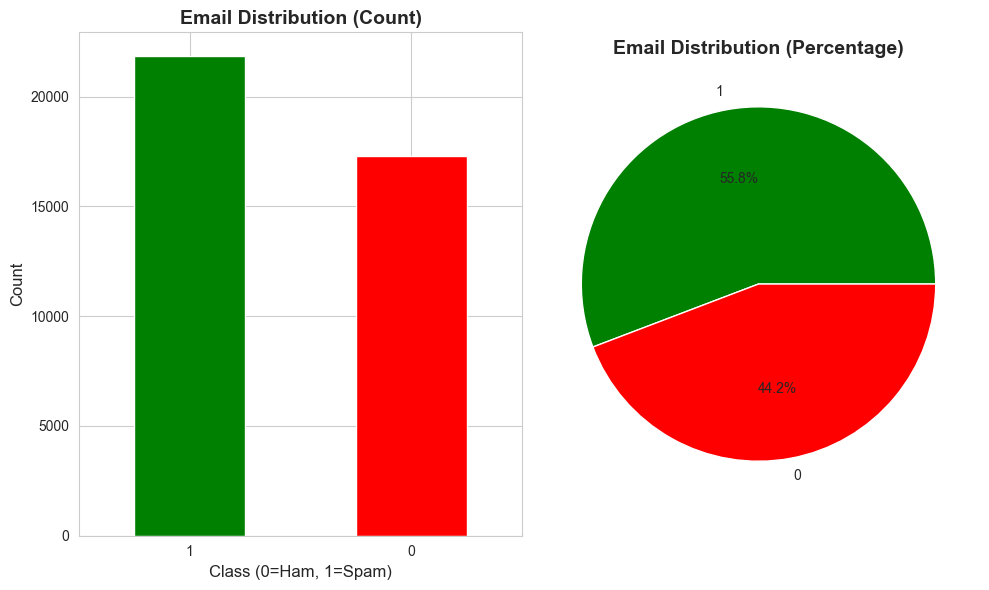

In [5]:
print("\n" + "="*60)
print("STEP 3: EXPLORATORY DATA ANALYSIS")
print("="*60)

# Class Distribution
print("\n--- Class Distribution ---")
print(df['label'].value_counts())
print("\nClass Distribution (Percentage):")
print(df['label'].value_counts(normalize=True) * 100)

# Visualize class distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Email Distribution (Count)', fontsize=14, fontweight='bold')
plt.xlabel('Class (0=Ham, 1=Spam)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Email Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
print("\n--- Feature Engineering ---")

# Text length features
df['subject_length'] = df['subject'].fillna('').astype(str).apply(len)
df['body_length'] = df['body'].fillna('').astype(str).apply(len)
df['subject_word_count'] = df['subject'].fillna('').astype(str).apply(lambda x: len(x.split()))
df['body_word_count'] = df['body'].fillna('').astype(str).apply(lambda x: len(x.split()))

# URL count
df['url_count'] = df['urls'].fillna('').astype(str).apply(lambda x: len(x.split()))

# Combined text
df['combined_text'] = df['subject'].fillna('').astype(str) + ' ' + df['body'].fillna('').astype(str)

# Special characters count
df['exclamation_count'] = df['combined_text'].apply(lambda x: x.count('!'))
df['question_count'] = df['combined_text'].apply(lambda x: x.count('?'))
df['capital_count'] = df['combined_text'].apply(lambda x: sum(1 for c in x if c.isupper()))

print("New features created:")
print(df[['subject_length', 'body_length', 'url_count', 'exclamation_count']].head())

# Statistical comparison between Spam and Ham
print("\n--- Statistical Comparison: Spam vs Ham ---")
print("\nAverage Subject Length:")
print(df.groupby('label')['subject_length'].mean())

print("\nAverage Body Length:")
print(df.groupby('label')['body_length'].mean())

print("\nAverage URL Count:")
print(df.groupby('label')['url_count'].mean())

print("\nAverage Exclamation Marks:")
print(df.groupby('label')['exclamation_count'].mean())




--- Feature Engineering ---
New features created:
   subject_length  body_length  url_count  exclamation_count
0              25          273          1                  2
1              22           82          1                  0
2              20         3918          1                  0
3             150        24418          1                  4
4              26          175          1                  0

--- Statistical Comparison: Spam vs Ham ---

Average Subject Length:
label
0    48.084277
1    31.614321
Name: subject_length, dtype: float64

Average Body Length:
label
0    2542.186287
1     801.379452
Name: body_length, dtype: float64

Average URL Count:
label
0    1.0
1    1.0
Name: url_count, dtype: float64

Average Exclamation Marks:
label
0    1.111483
1    0.908754
Name: exclamation_count, dtype: float64


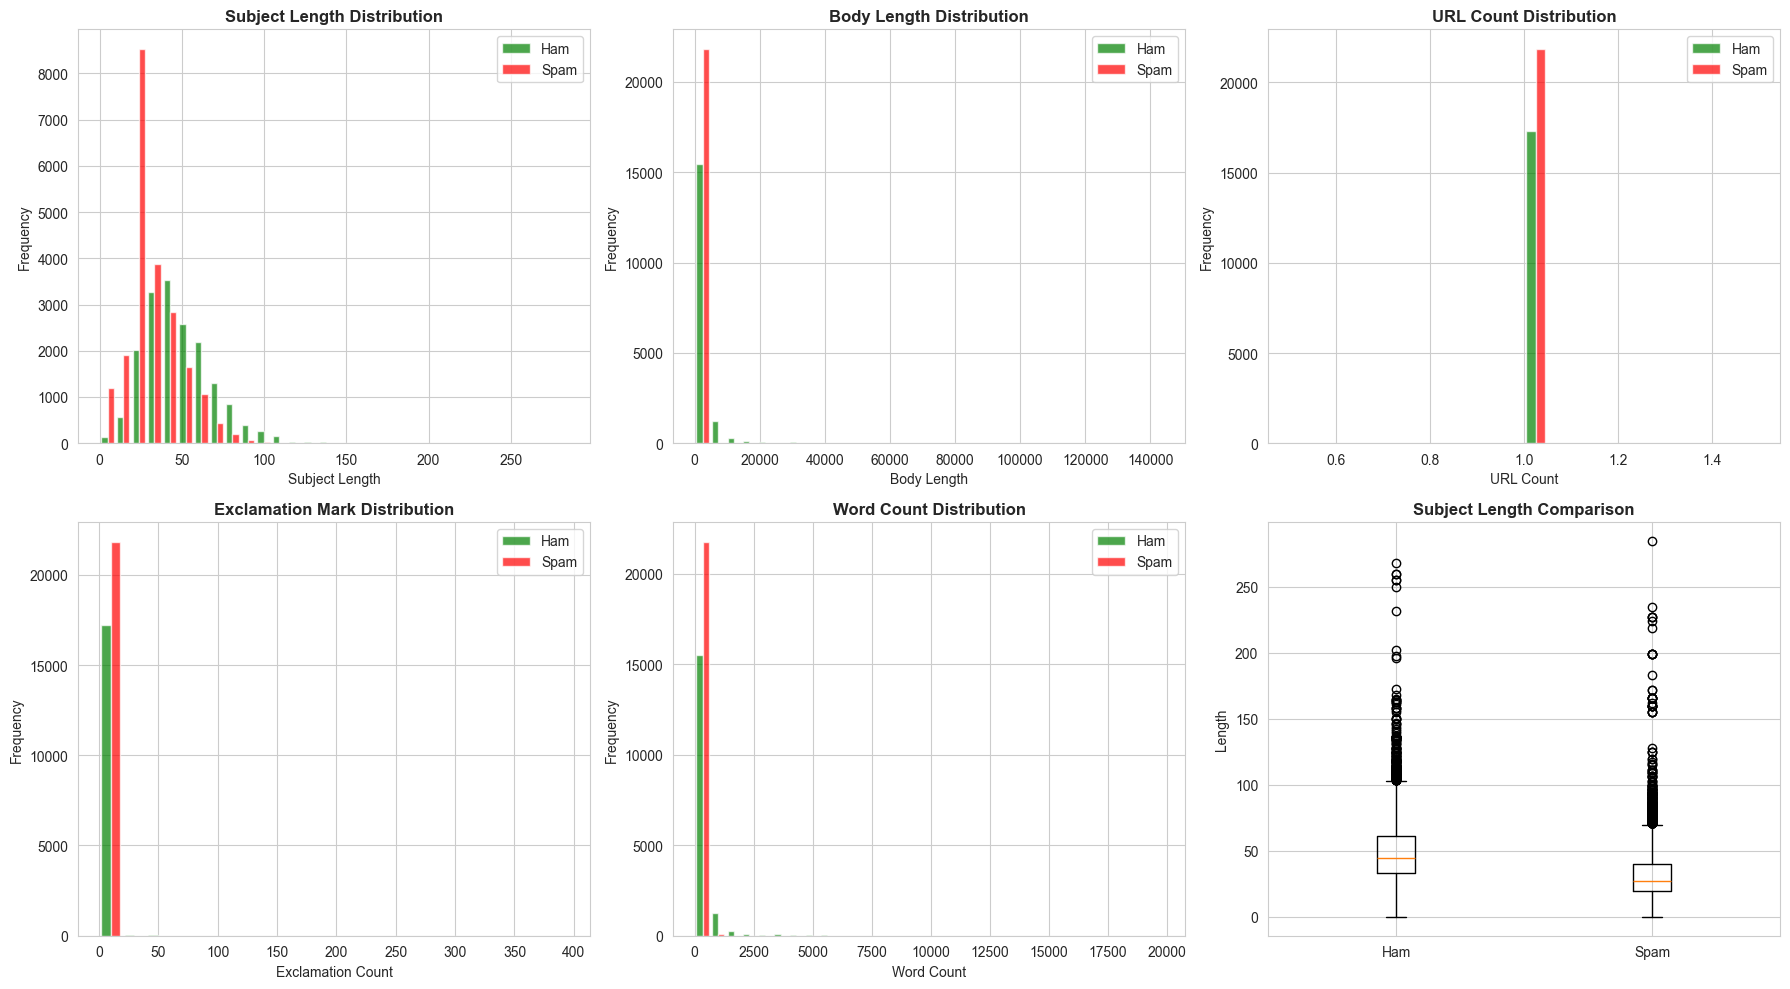


--- Feature Correlations ---


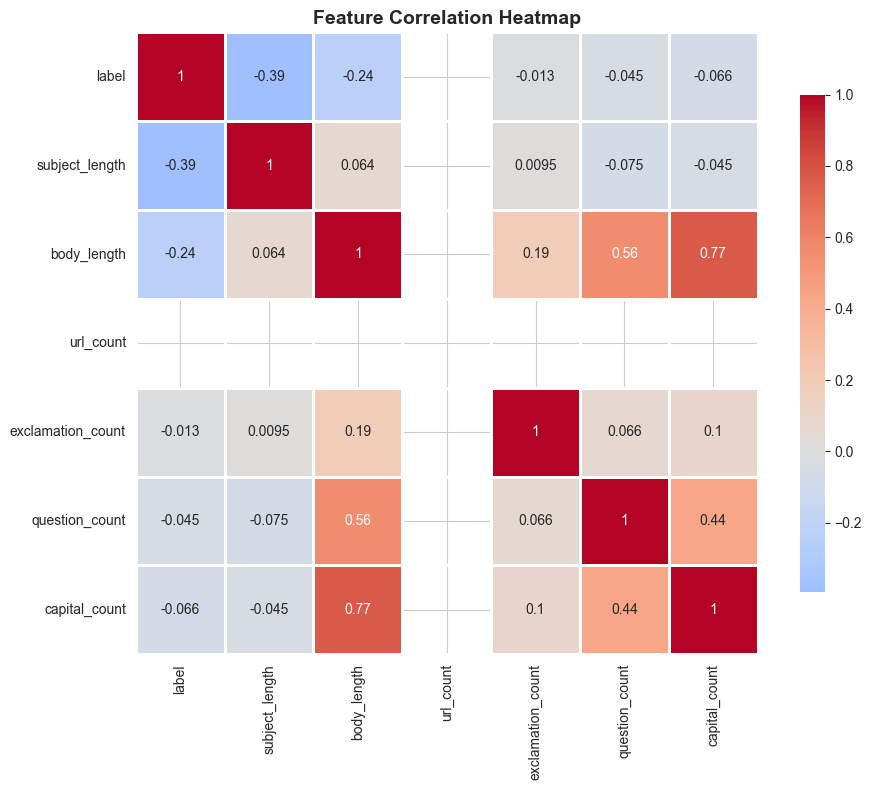

In [8]:
# Visualize feature distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Subject Length
axes[0, 0].hist([df[df['label']==0]['subject_length'], df[df['label']==1]['subject_length']], 
                bins=30, label=['Ham', 'Spam'], color=['green', 'red'], alpha=0.7)
axes[0, 0].set_title('Subject Length Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Subject Length')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Body Length
axes[0, 1].hist([df[df['label']==0]['body_length'], df[df['label']==1]['body_length']], 
                bins=30, label=['Ham', 'Spam'], color=['green', 'red'], alpha=0.7)
axes[0, 1].set_title('Body Length Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Body Length')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# URL Count
axes[0, 2].hist([df[df['label']==0]['url_count'], df[df['label']==1]['url_count']], 
                bins=20, label=['Ham', 'Spam'], color=['green', 'red'], alpha=0.7)
axes[0, 2].set_title('URL Count Distribution', fontweight='bold')
axes[0, 2].set_xlabel('URL Count')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()

# Exclamation Count
axes[1, 0].hist([df[df['label']==0]['exclamation_count'], df[df['label']==1]['exclamation_count']], 
                bins=20, label=['Ham', 'Spam'], color=['green', 'red'], alpha=0.7)
axes[1, 0].set_title('Exclamation Mark Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Exclamation Count')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Word Count
axes[1, 1].hist([df[df['label']==0]['body_word_count'], df[df['label']==1]['body_word_count']], 
                bins=30, label=['Ham', 'Spam'], color=['green', 'red'], alpha=0.7)
axes[1, 1].set_title('Word Count Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

# Box plot comparison
feature_data = pd.DataFrame({
    'Ham Subject': df[df['label']==0]['subject_length'],
    'Spam Subject': df[df['label']==1]['subject_length'],
    'Ham Body': df[df['label']==0]['body_length'],
    'Spam Body': df[df['label']==1]['body_length']
})
axes[1, 2].boxplot([df[df['label']==0]['subject_length'], 
                     df[df['label']==1]['subject_length']], 
                    labels=['Ham', 'Spam'])
axes[1, 2].set_title('Subject Length Comparison', fontweight='bold')
axes[1, 2].set_ylabel('Length')

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation heatmap
print("\n--- Feature Correlations ---")
correlation_features = ['label', 'subject_length', 'body_length', 'url_count', 
                        'exclamation_count', 'question_count', 'capital_count']
corr_matrix = df[correlation_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
